In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=True)


print("Training dataset info:")
for image, label in ds_train.take(1):
    print("Image shape:", image.shape)
    print("Label:", label.numpy())
print("Test dataset info:")
for image, label in ds_test.take(1):
    print("Image shape:", image.shape)
    print("Label:", label.numpy())


train_count = tf.data.experimental.cardinality(ds_train).numpy()
test_count = tf.data.experimental.cardinality(ds_test).numpy()

Training dataset info:
Image shape: (28, 28, 1)
Label: 4
Test dataset info:
Image shape: (28, 28, 1)
Label: 2


2025-05-06 14:19:39.376829: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-05-06 14:19:39.381713: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-05-06 14:19:39.382271: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-06 14:19:39.401313: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached conte

In [4]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    # Ensure label is int32
    label = tf.cast(label, tf.int32)
    return image, label


BATCH_SIZE = 32
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


for image_batch, label_batch in ds_train.take(1):
    X_train_sample = image_batch.numpy()
    y_train_sample = label_batch.numpy()
print("Sample batch shapes:")
print("X_train_sample shape:", X_train_sample.shape)
print("y_train_sample shape:", y_train_sample.shape)

Sample batch shapes:
X_train_sample shape: (32, 28, 28, 1)
y_train_sample shape: (32,)


2025-05-06 14:19:39.455204: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


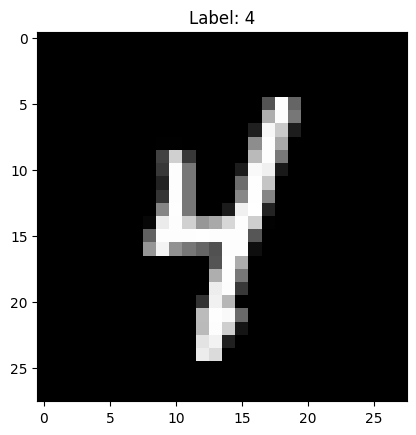

In [5]:
plt.imshow(X_train_sample[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {y_train_sample[0]}')
plt.show()
plt.close()

In [6]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10


/Users/netsmartz/Downloads/Number Recognition/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9119 - loss: 0.2876 - val_accuracy: 0.9846 - val_loss: 0.0502
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9858 - loss: 0.0484 - val_accuracy: 0.9880 - val_loss: 0.0380
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9912 - loss: 0.0310 - val_accuracy: 0.9877 - val_loss: 0.0380
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9887 - val_loss: 0.0380
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9951 - loss: 0.0175 - val_accuracy: 0.9881 - val_loss: 0.0403
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9964 - loss: 0.0134 - val_accuracy: 0.9854 - val_loss: 0.0621
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9964 - loss: 0.0131 - val_accuracy: 0.9886 - val_loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9967 - loss: 0.0091 - val

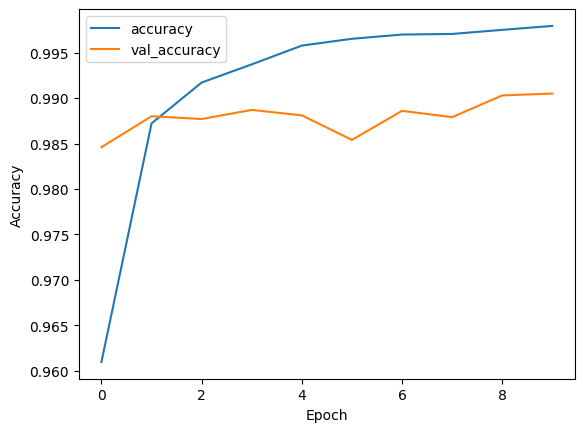

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()

In [8]:
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test accuracy: {test_acc}')

train_loss, train_acc = model.evaluate(ds_train)
print(f'Training accuracy: {train_acc:.4f}')

for image_batch, label_batch in ds_test.take(1):
    predictions = model.predict(image_batch)
    for i in range(5):
        print(f'Predicted: {np.argmax(predictions[i])}, Actual: {label_batch[i].numpy()}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0335
Test accuracy: 0.9904999732971191
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9979 - loss: 0.0056
Training accuracy: 0.9982
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7


2025-05-06 14:22:25.458285: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Input image shape: (28, 28, 1)
Input value range: 0.0 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction probabilities: [[1.0000000e+00 4.0420240e-19 2.4119325e-15 4.1416911e-23 1.5378899e-17
  2.1857700e-13 4.2880868e-12 1.5228500e-19 3.2744614e-15 1.7339899e-14]]


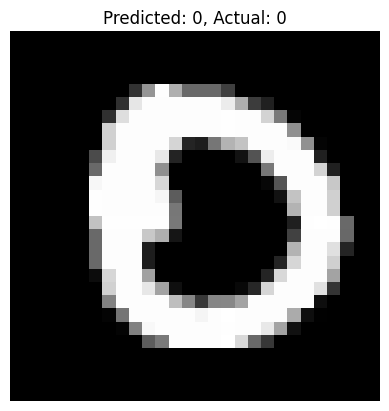

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def predict_digit(image_array):
    print("Input image shape:", image_array.shape)
    print("Input value range:", image_array.min(), image_array.max())
    
    image_array = image_array.reshape(1, 28, 28, 1)
    
    image_array = image_array.astype('float32')
    
    prediction = model.predict(image_array)
    
    print("Prediction probabilities:", prediction)
    
    return np.argmax(prediction[0])


for image_batch, label_batch in ds_test.take(1):
    sample_image = image_batch[1].numpy()
    sample_label = label_batch[1].numpy()


predicted_digit = predict_digit(sample_image)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {sample_label}")
plt.axis('off')
plt.show()

Image 1: Predicted digit: 3, Actual digit: 3
Image 2: Predicted digit: 9, Actual digit: 9
Sum: 3 + 9 = 12


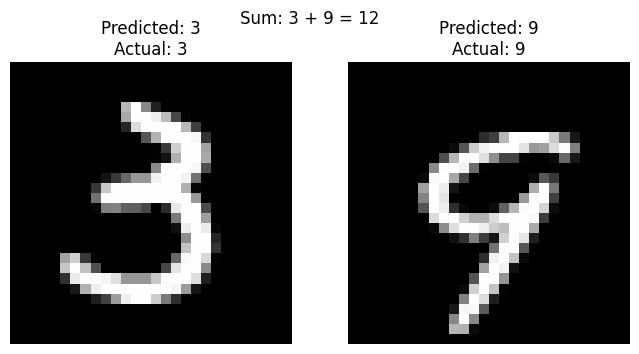

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


def preprocess_image(image):
    image = image.astype('float32') / 255.0
    image = image.reshape(1, 28, 28, 1)
    return image


def predict_digit(image):
    image = preprocess_image(image)
    prediction = model.predict(image, verbose=0)
    return np.argmax(prediction[0])


ds_test = tfds.load('mnist', split='test', as_supervised=True)
ds_test = ds_test.shuffle(buffer_size=1000)
iterator = iter(ds_test)
image1, label1 = next(iterator)
image2, label2 = next(iterator)
image1_np = image1.numpy()
image2_np = image2.numpy()
true_label1 = label1.numpy()
true_label2 = label2.numpy()

predicted_digit1 = predict_digit(image1_np)
predicted_digit2 = predict_digit(image2_np)


digit_sum = predicted_digit1 + predicted_digit2

print(f"Image 1: Predicted digit: {predicted_digit1}, Actual digit: {true_label1}")
print(f"Image 2: Predicted digit: {predicted_digit2}, Actual digit: {true_label2}")
print(f"Sum: {predicted_digit1} + {predicted_digit2} = {digit_sum}")


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image1_np.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit1}\nActual: {true_label1}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2_np.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit2}\nActual: {true_label2}")
plt.axis('off')
plt.suptitle(f"Sum: {predicted_digit1} + {predicted_digit2} = {digit_sum}")
plt.show()

Image 1: Predicted digit: 4
Image 2: Predicted digit: 6
Sum: 4 + 6 = 10


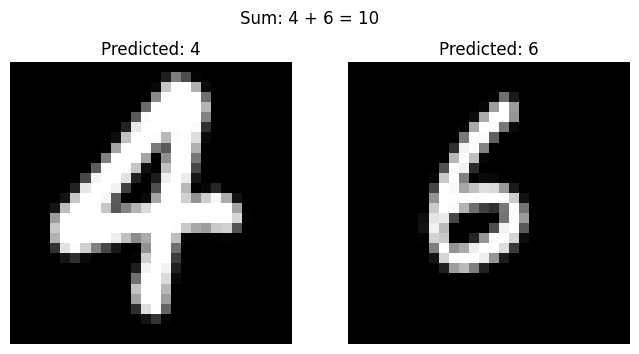

In [11]:

from PIL import Image

image_path1 = 'digit4.png' 
image_path2 = 'digit2.png' 
try:
    img1 = Image.open(image_path1).convert('L')
    img1 = img1.resize((28, 28))
    image1_np = np.array(img1)
    if image1_np.max() > image1_np.min():
        image1_np = 255 - image1_np
    
    img2 = Image.open(image_path2).convert('L')
    img2 = img2.resize((28, 28))
    image2_np = np.array(img2)
    if image2_np.max() > image2_np.min():
        image2_np = 255 - image2_np
    

    predicted_digit1 = predict_digit(image1_np)
    predicted_digit2 = predict_digit(image2_np)
    

    digit_sum = predicted_digit1 + predicted_digit2
    

    print(f"Image 1: Predicted digit: {predicted_digit1}")
    print(f"Image 2: Predicted digit: {predicted_digit2}")
    print(f"Sum: {predicted_digit1} + {predicted_digit2} = {digit_sum}")
    

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image1_np.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit1}")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_np.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit2}")
    plt.axis('off')
    plt.suptitle(f"Sum: {predicted_digit1} + {predicted_digit2} = {digit_sum}")
    plt.show()
except Exception as e:
    print(f"Error processing images: {e}")

Left digit: Predicted: 4
Right digit: Predicted: 7
Sum: 4 + 7 = 11


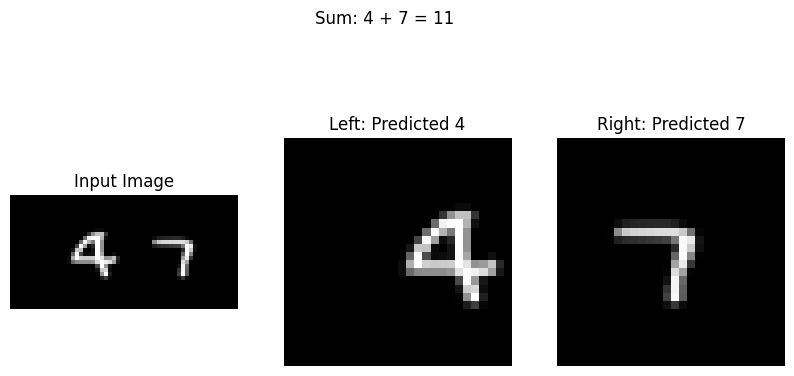

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def preprocess_image(image):
    image = image.astype('float32') / 255.0
    image = image.reshape(1, 28, 28, 1)
    return image


def predict_digit(image):
    image = preprocess_image(image)
    prediction = model.predict(image, verbose=0)
    return np.argmax(prediction[0])




image_path = 'two_digits.png'
try:

    img = Image.open(image_path).convert('L')
    img = img.resize((56, 28))
    img_array = np.array(img)
    
    if img_array.max() > img_array.min():
        img_array = 255 - img_array
    
    left_digit = img_array[:, :28]
    right_digit = img_array[:, 28:]
    
    left_digit = left_digit.reshape(28, 28, 1)
    right_digit = right_digit.reshape(28, 28, 1)
    
    predicted_digit1 = predict_digit(left_digit)
    predicted_digit2 = predict_digit(right_digit)
    
    digit_sum = predicted_digit1 + predicted_digit2
    
    print(f"Left digit: Predicted: {predicted_digit1}")
    print(f"Right digit: Predicted: {predicted_digit2}")
    print(f"Sum: {predicted_digit1} + {predicted_digit2} = {digit_sum}")
    

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_array.reshape(28, 56), cmap='gray')
    plt.title("Input Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(left_digit.reshape(28, 28), cmap='gray')
    plt.title(f"Left: Predicted {predicted_digit1}")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(right_digit.reshape(28, 28), cmap='gray')
    plt.title(f"Right: Predicted {predicted_digit2}")
    plt.axis('off')
    plt.suptitle(f"Sum: {predicted_digit1} + {predicted_digit2} = {digit_sum}")
    plt.show()
except Exception as e:
    print(f"Error processing image: {e}")

In [14]:
model.save("number_recognition_model.keras")